In [25]:
import pandas as pd
from pandas import DataFrame, Series

In [26]:
titanic_df = pd.read_csv('train.csv')

In [8]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


1. Who were the passengers on the Titanic?

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='Sex', ylabel='count'>

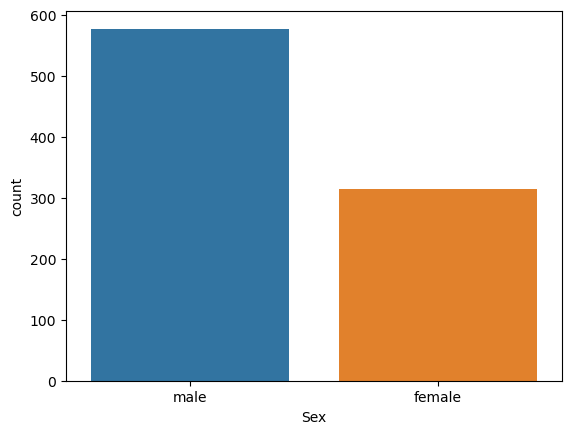

In [14]:
sns.countplot(x='Sex',data=titanic_df)

<Axes: xlabel='Pclass', ylabel='count'>

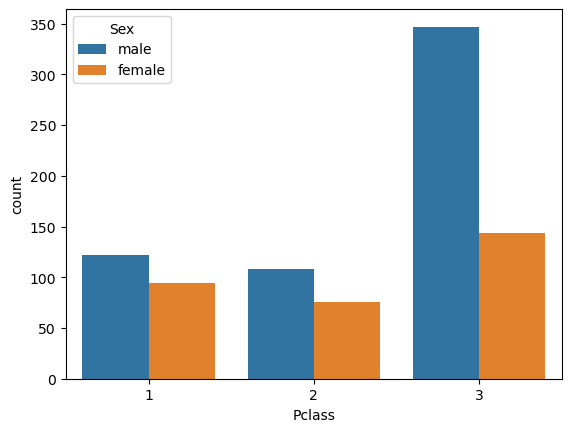

In [16]:
sns.countplot(x='Pclass',data=titanic_df,hue='Sex')

In [17]:
def male_female_child(passenger):
    age,sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

In [29]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [19]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


<Axes: xlabel='Pclass', ylabel='count'>

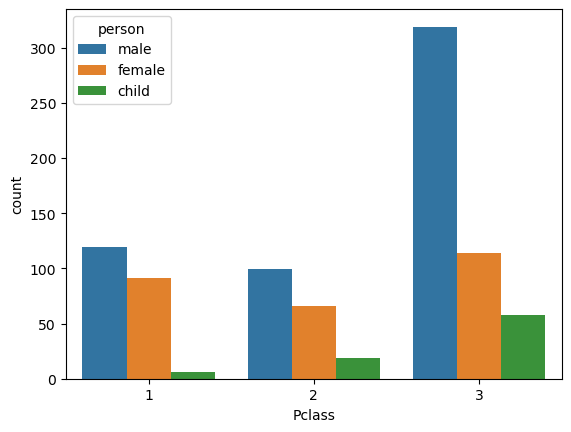

In [20]:
sns.countplot(x='Pclass',data=titanic_df,hue='person')

<Axes: >

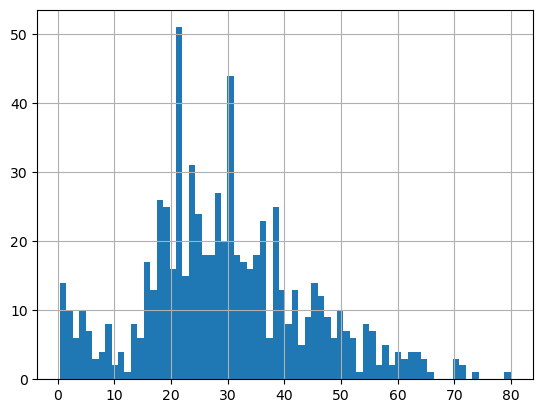

In [21]:
titanic_df['Age'].hist(bins=70)

In [22]:
titanic_df['Age'].mean()

29.69911764705882

In [23]:
titanic_df['person'].value_counts()

person
male      537
female    271
child      83
Name: count, dtype: int64

C:\Users\anale\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


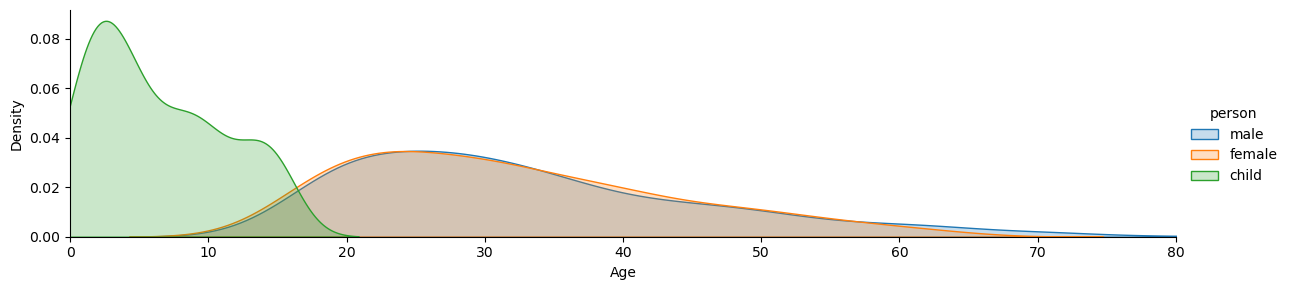

In [34]:
fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',fill=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend()

C:\Users\anale\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


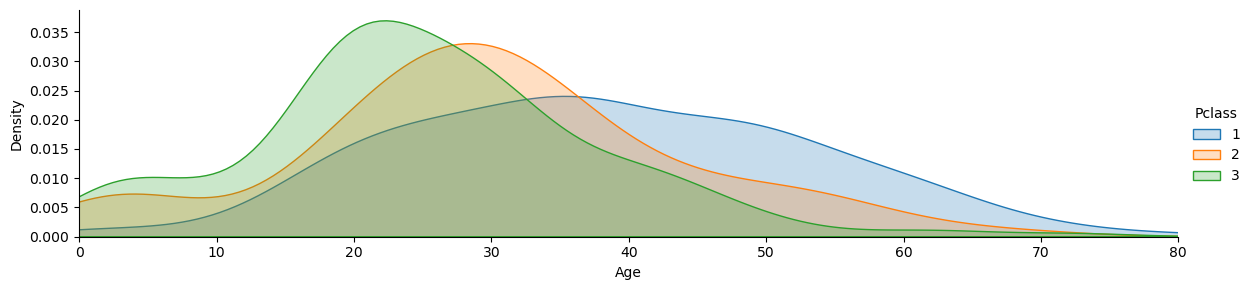

In [35]:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',fill=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend()

2.What deck were the passengers on and how does that relate to their class?

In [36]:
deck = titanic_df['Cabin'].dropna()

In [41]:
deck[0:10]

1             C85
3            C123
6             E46
10             G6
11           C103
21            D56
23             A6
27    C23 C25 C27
31            B78
52            D33
Name: Cabin, dtype: object

<Axes: xlabel='Cabin', ylabel='count'>

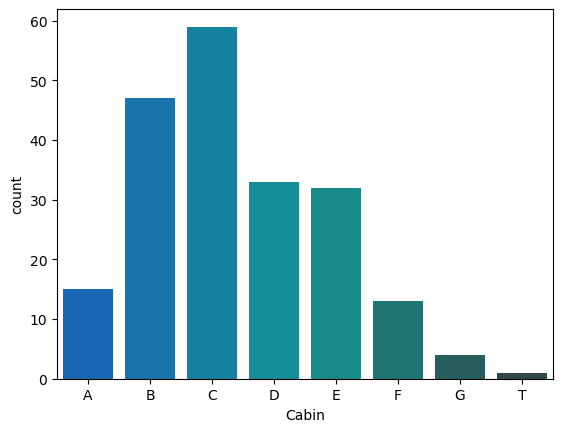

In [46]:
levels = []

for level in deck:
    levels.append(level[0])
levels.sort()
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

sns.countplot(x='Cabin',data=cabin_df, palette = 'winter_d')

<Axes: xlabel='Cabin', ylabel='count'>

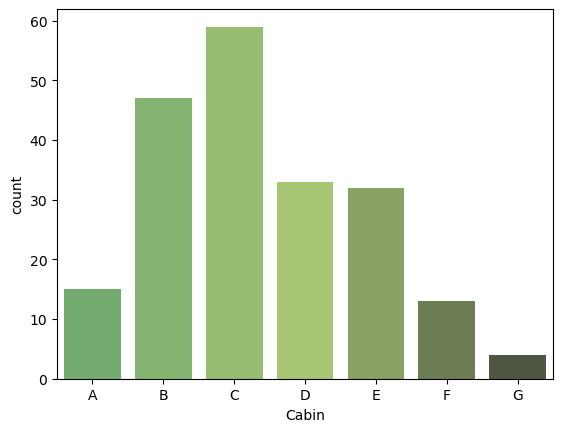

In [48]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.countplot(x='Cabin',data=cabin_df, palette = 'summer_d')

In [49]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


<Axes: xlabel='Embarked', ylabel='count'>

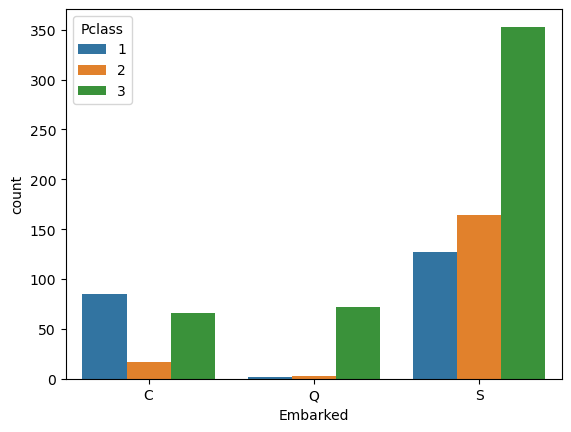

In [53]:
sns.countplot(x='Embarked',data=titanic_df,hue='Pclass',order=['C','Q','S'])

In [55]:
# travel alone or with family members
# SibSp - siblings onboard 0 or 1
# Parch - parents or children onboard 0 or 1

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [56]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [58]:
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'

C:\Users\anale\AppData\Local\Temp\ipykernel_8924\2371658283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'


In [59]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


<Axes: xlabel='Alone', ylabel='count'>

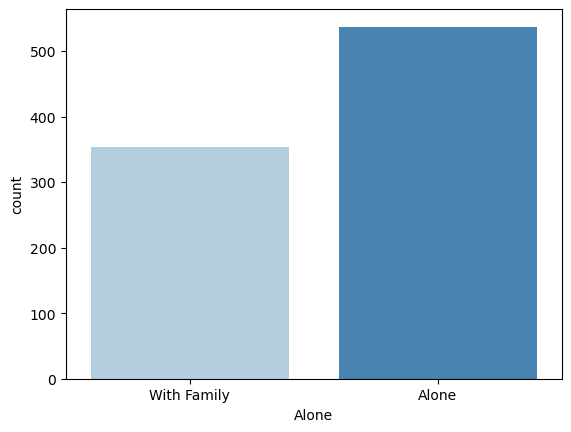

In [60]:
sns.countplot(x='Alone',data=titanic_df,palette='Blues')

3. What factors helped somone survive the sinking of the Titanic?

<Axes: xlabel='Survivor', ylabel='count'>

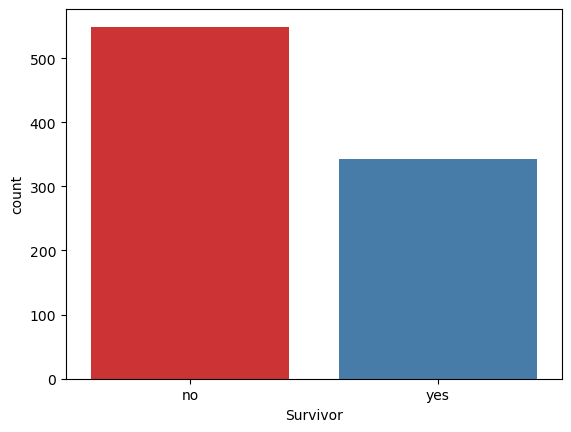

In [62]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

sns.countplot(x='Survivor',data=titanic_df,palette='Set1')

<Axes: xlabel='Pclass', ylabel='count'>

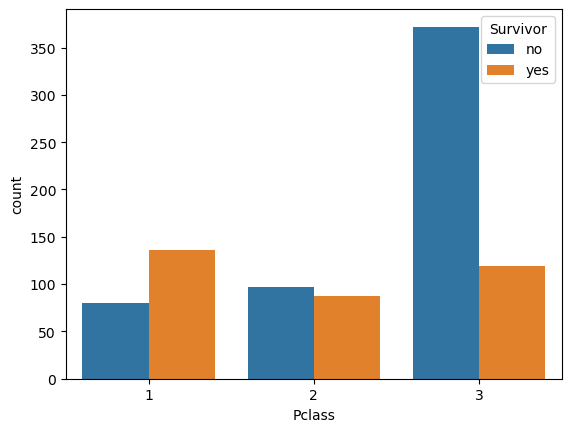

In [65]:
# check if class was a factor
sns.countplot(x='Pclass',hue='Survivor',data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

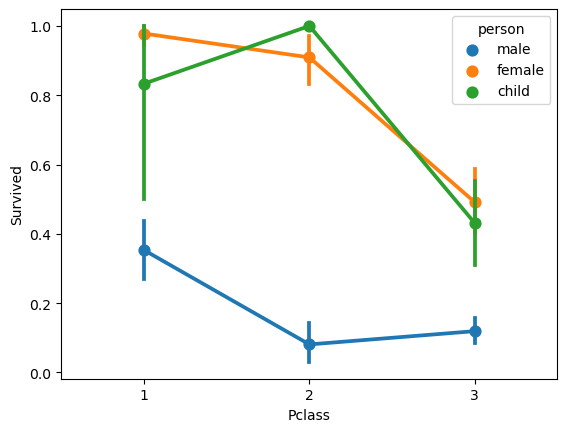

In [68]:
sns.pointplot(x='Pclass',y='Survived',data=titanic_df, hue = 'person')

C:\Users\anale\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


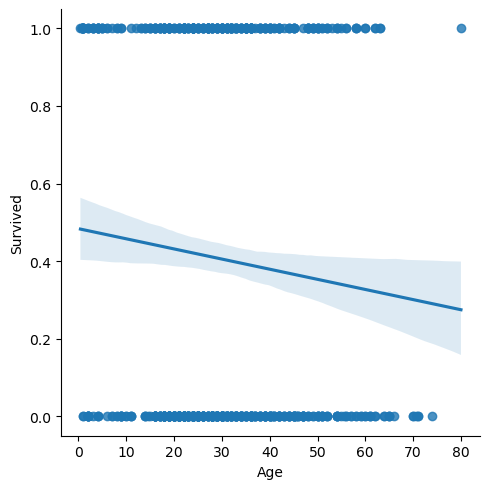

In [69]:
sns.lmplot(x='Age',y='Survived',data=titanic_df)

C:\Users\anale\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


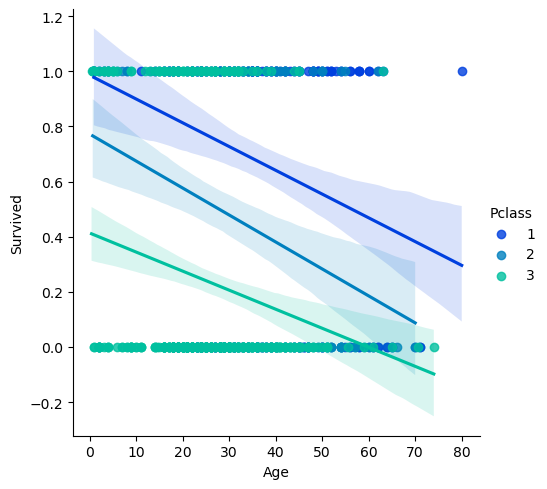

In [70]:
sns.lmplot(x='Age',y='Survived',data=titanic_df,hue='Pclass',palette='winter')

C:\Users\anale\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


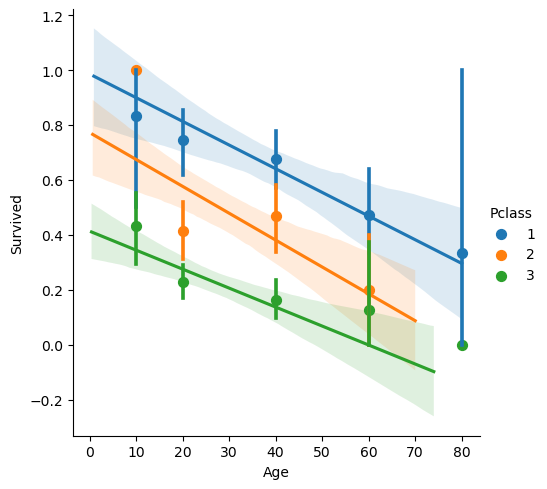

In [71]:
age_bins= [10,20,40,60,80]

sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanic_df,x_bins=age_bins)

C:\Users\anale\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


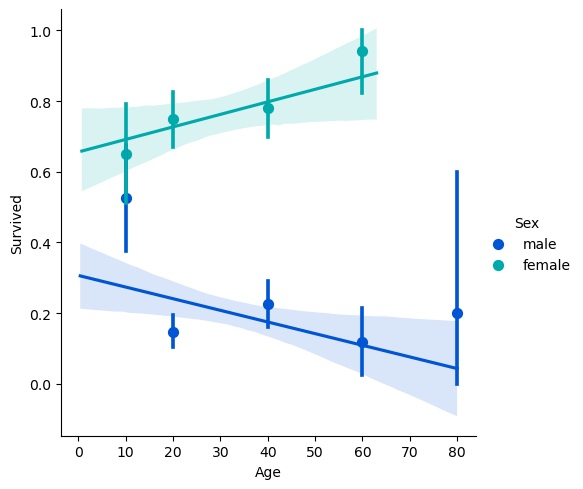

In [72]:
sns.lmplot(x='Age', y='Survived', hue='Sex',data=titanic_df,palette='winter',x_bins=age_bins)

In [78]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


4. Did the deck have an effect on the passengers survival rate?

In [79]:
cabin_df

,Cabin
0,A
1,A
2,A
3,A
4,A
...,...
198,F
199,G
200,G
201,G


In [106]:
import numpy as np

titanic_df['Deck']=titanic_df['Cabin']
titanic_df['Deck']=titanic_df['Deck'].str[0]


In [107]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,NaN,no,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,NaN,yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,NaN,yes,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,NaN,yes,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,NaN,no,NaN


<Axes: xlabel='Deck', ylabel='count'>

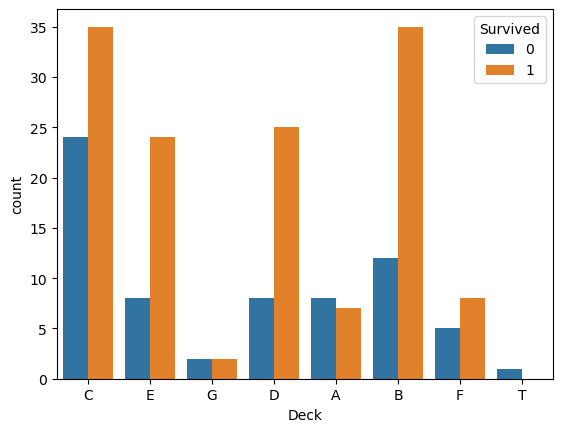

In [110]:
sns.countplot(x='Deck',hue='Survived',data=titanic_df)

In [112]:
group1 = titanic_df['Survived'].groupby(titanic_df['Deck'])
group1.mean()

Deck
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
Name: Survived, dtype: float64

A: Highest surviving rate: Decks D, E, B.